Book Analysis

This data set contains information on more than 111k books published worldwide and in several languages. The data includes information on the title, author, language, publication date, genre, publisher, number of pages, and reviews for each book.

In this analysis, we focused on exploring the relationships between reviews, rating, popularity, genre, publication date, and authors of the books. In addition, we investigated the correlation between the number of reviews and the popularity of the books, the relationship between genres and popularity, and the relationship between the date of publication and the number of reviews.

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import opendatasets as od
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
%matplotlib inline
sns.set(style = 'darkgrid')
sns.set_palette('deep')

In [ ]:
data = pd.read_csv("books.csv", sep='[,:\r]', error_bad_lines = False)
# index_col = False

In [ ]:
data

In [ ]:
# show the first few rows
data.head(5)

In [ ]:
# check basic features and data types
data.info()

In [ ]:
# Dtype change
data['average_rating'] = data['average_rating'].astype('float64')

In [ ]:
# check no. of records
len(data)

Data Cleaning

In [ ]:
# check for doublications
data.duplicated().any()

In [ ]:
# check that there are no duplicates or empty data
colores = ["#d7bde2", "#c39bd3", "#7d3c98", "#9b59b6", "#8e44ad"]
sns.heatmap(data.isnull(), cmap=colores)

Data Visualization

Text(0, 0.5, 'Frequency')

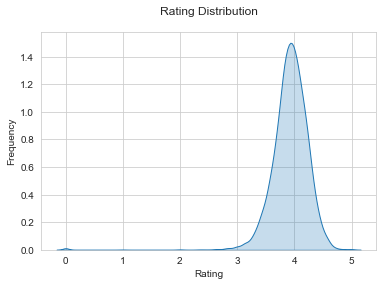

In [46]:
# ratings distribution
sns.kdeplot(data['average_rating'], shade = True, cmap="pink")
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Frequency')

In [47]:
data['language_code'].unique()

array(['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'grc', 'enm',
       'en-CA', 'ger', 'jpn', 'ara', 'nl', 'zho', 'por', 'srp', 'ita',
       'lat', 'rus', 'msa', 'glg', 'swe', 'nor', 'tur', 'gla', 'ale'],
      dtype=object)

In [48]:
valores_unicos = data["language_code"].unique().tolist()

In [49]:
# concept replacement
referencias = {"eng": "English", "en-US": "English_US","fre": "French","spa": "Spanich","en-GB": "English_GB","en-CA": "English_CA",
                "ger": "Germany","jpn": "Japanece","ara": "Arabe","por": "Portuguese","ita": "Italian","rus": "Russian",
                "tur": "Turqui","nl": "Dutch","zho": "Chinese","srp": "Serbian","msa": "Mandarin Chinese","glg": "Galician","swe": "Swedish",
                "nor": "Norwegian","gla": "Germany","ale": "Germany","mul": "Multiple Languages","grc": "Greek","enm": "Moroccans","lat": "Latin"}
                

In [50]:
# review of changes
tabla_comparativa = pd.DataFrame({"Unique Values": valores_unicos, "References": [referencias.get(valor, "") for valor in valores_unicos]})
print(tabla_comparativa)

   Unique Values          References
0            eng             English
1          en-US          English_US
2            fre              French
3            spa             Spanich
4          en-GB          English_GB
5            mul  Multiple Languages
6            grc               Greek
7            enm           Moroccans
8          en-CA          English_CA
9            ger             Germany
10           jpn            Japanece
11           ara               Arabe
12            nl               Dutch
13           zho             Chinese
14           por          Portuguese
15           srp             Serbian
16           ita             Italian
17           lat               Latin
18           rus             Russian
19           msa    Mandarin Chinese
20           glg            Galician
21           swe             Swedish
22           nor           Norwegian
23           tur              Turqui
24           gla             Germany
25           ale             Germany


In [51]:
# create a color chart
colores = ["#d7bde2", "#c39bd3", "#7d3c98", "#9b59b6", "#8e44ad"]

Text(0, 0.5, 'Title')

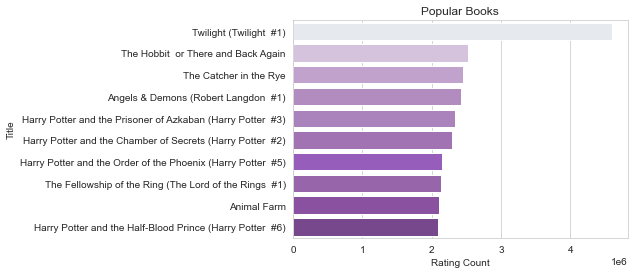

In [52]:
# popular books
popular_books = data.nlargest(10, ['ratings_count']).set_index('title')['ratings_count']

# create color chart
colores = ["#9b4dca", "#a569bd", "#8e44ad", "#9b59b6", "#af7ac5", "#b784c7", "#7d3c98", "#c39bd3", "#d7bde2", "#e5eaf0"]
colores.sort(key=lambda c: sum(int(c[i:i+2], 16) for i in (1, 3, 5)) / 3, reverse=True)

sns.barplot(x=popular_books, y=popular_books.index, palette=colores)
plt.title("Popular Books")
plt.xlabel('Rating Count')
plt.ylabel('Title')

Text(0, 0.5, 'Title')

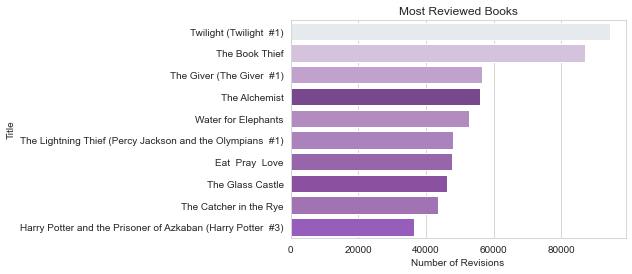

In [53]:
# what are not most reviewed titles
paleta = sns.color_palette(["#e5eaf0", "#d7bde2", "#c39bd3", "#7d3c98", "#b784c7", "#af7ac5", "#9b59b6", "#8e44ad", "#a569bd", "#9b4dca"])
highest_reviews = data.nlargest(10, ['text_reviews_count'])
sns.barplot(x= highest_reviews['text_reviews_count'], y= highest_reviews['title'], palette=paleta)
plt.title('Most Reviewed Books')
plt.xlabel('Number of Revisions')
plt.ylabel('Title')

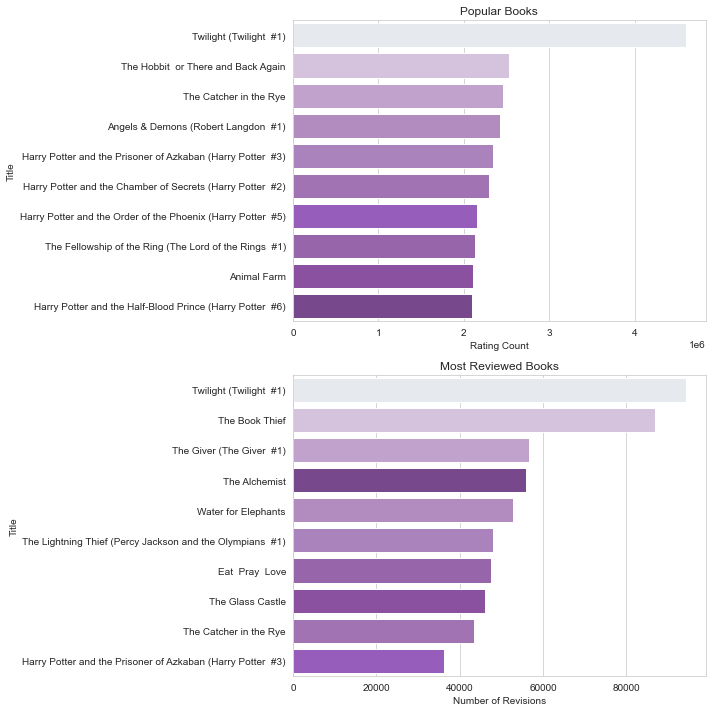

In [54]:
# comparison between the most reviewed books and the most popular ones, with this we want to know if there is a correlation between these two variables
popular_books = data.nlargest(10, 'ratings_count').set_index('title')['ratings_count']
most_reviewed_books = data.nlargest(10, 'text_reviews_count').set_index('title')['text_reviews_count']

# popular books
sns.set_style('whitegrid')
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
sns.barplot(x=popular_books, y=popular_books.index, palette=colores, ax=axes[0])
axes[0].set_title("Popular Books")
axes[0].set_xlabel('Rating Count')
axes[0].set_ylabel('Title')

# what are not most reviewed titles
sns.barplot(x=most_reviewed_books, y=most_reviewed_books.index, palette=paleta, ax=axes[1])
axes[1].set_title('Most Reviewed Books')
axes[1].set_xlabel('Number of Revisions')
axes[1].set_ylabel('Title')


plt.tight_layout()
plt.show()

After analyzing the data, we can conclude that although there is a wide variety of books in the dataset, there is a low correlation between the most popular books and the most reviewed books.

While some of the most popular books are also among the most reviewed, there are a large number of books that appear on only one of the two lists. In fact, only two books appear on both the top ten most popular books list and the top ten most reviewed books list.

This suggests that the factors that influence the popularity of a book are not the same as those that influence the number of reviews it receives. For example, one book may have a large number of ratings because it is well known, while another book may receive many reviews because it has become a reference book on its subject.

Now let`s analyze the authors

Text(0.5, 1.0, 'Authors with Most Books')

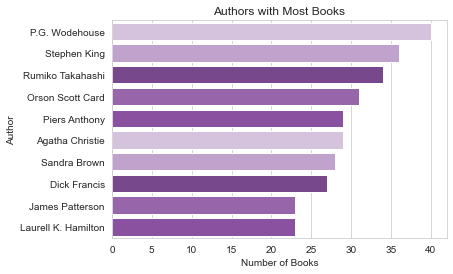

In [55]:
# authors with the largest number of books published
top_authors = data['authors'].value_counts().nlargest(10)

colores = ["#d7bde2", "#c39bd3", "#7d3c98", "#9b59b6", "#8e44ad"]
sns.barplot(x=top_authors.values, y=top_authors.index, palette=colores)
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.title('Authors with Most Books')

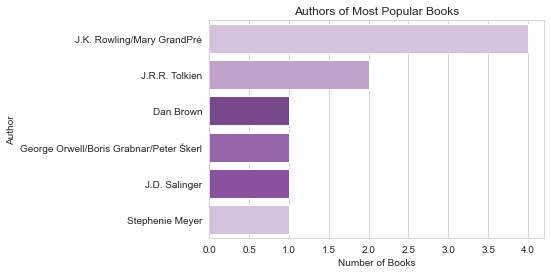

In [56]:
# authors of the most popular books
top_popular_books = data.nlargest(10, 'ratings_count')

# group the books by author and count the number of books
author_counts = top_popular_books.groupby('authors')['title'].count().reset_index(name='count')

# sort the author counts by number of books in descending order
author_counts = author_counts.sort_values('count', ascending=False)

colores = ["#d7bde2", "#c39bd3", "#7d3c98", "#9b59b6", "#8e44ad"]
sns.barplot(x='count', y='authors', data=author_counts, palette=colores)
plt.title('Authors of Most Popular Books')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.show()

We can find that the number of books an author has is not related to their popularity. We can see that Stephen King is one of the authors with the highest number of books but he is not in the top 10 of the most popular books. And Stephenie Meyer has only one book and it is positioned as the most popular book. 

We always have to keep in mind that the data set has information about books published between 1900 and 2007. 

We will now take a look at the book rating

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '119'),
  Text(1, 0, '121'),
  Text(2, 0, '123'),
  Text(3, 0, '124'),
  Text(4, 0, '125'),
  Text(5, 0, '127'),
  Text(6, 0, '131'),
  Text(7, 0, '136'),
  Text(8, 0, '139'),
  Text(9, 0, '141'),
  Text(10, 0, '143'),
  Text(11, 0, '150')])

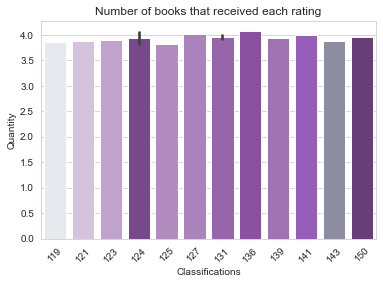

In [57]:
# create a color chart
paleta = sns.color_palette(["#e5eaf0", "#d7bde2", "#c39bd3", "#7d3c98", "#b784c7", "#af7ac5", "#9b59b6", "#8e44ad", "#a569bd", "#9b4dca", "#8a89a6", "#6c3483", "#76448a", "#5dade2", "#3498db"])
sns.barplot(y=data['average_rating'].value_counts().head(15).index, x=data['average_rating'].value_counts().head(15), palette=paleta)

# add title and labels on chart axis
plt.title('Number of books that received each rating')
plt.xlabel('Classifications')
plt.ylabel('Quantity')
plt.xticks(rotation=45)

We can notice that the average rating of the books found in the dataset does not vary in large proportions

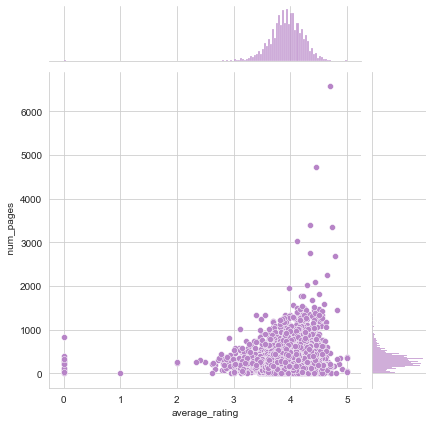

In [45]:
# visualise a bivariate distribution between ratings & no. of pages
palette = sns.color_palette(["#e5eaf0", "#d7bde2", "#c39bd3", "#7d3c98", "#b784c7", "#af7ac5", "#9b59b6", "#8e44ad", "#a569bd", "#9b4dca"])
sns.jointplot(x = 'average_rating', y = '  num_pages', data = data, kind='scatter', color=palette[4])

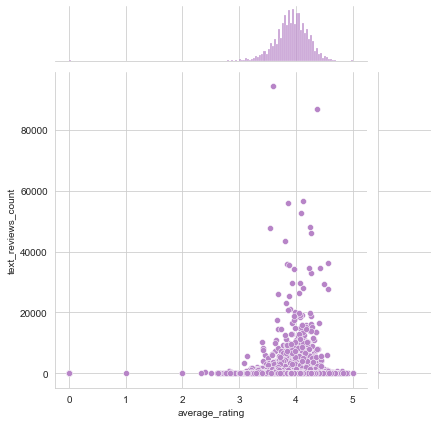

In [44]:
# visualise a bivariate distribution between ratings & no. of reviews
sns.jointplot(x = 'average_rating', y = 'text_reviews_count', data = data,color=palette[4])

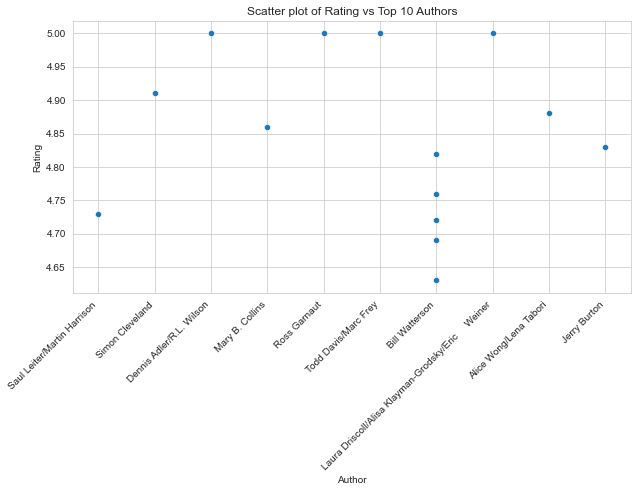

In [43]:

top_authors = data.groupby('authors')['average_rating'].mean().nlargest(10).index.tolist()

top_author_books = data[data['authors'].isin(top_authors)]

plt.figure(figsize=(10, 5))
sns.scatterplot(x='authors', y='average_rating', data=top_author_books,palette="#76448a")
top_books = data.nlargest(10, 'ratings_count')['title'].tolist()
plt.xticks(rotation=45, ha='right')
plt.title('Scatter plot of Rating vs Top 10 Authors')
plt.xlabel('Author')
plt.ylabel('Rating')
plt.show()

Finally, let's take a look at the most popular languages in which these books were published

Text(0.5, 1.0, 'Top 5 Most Common Languages\n')

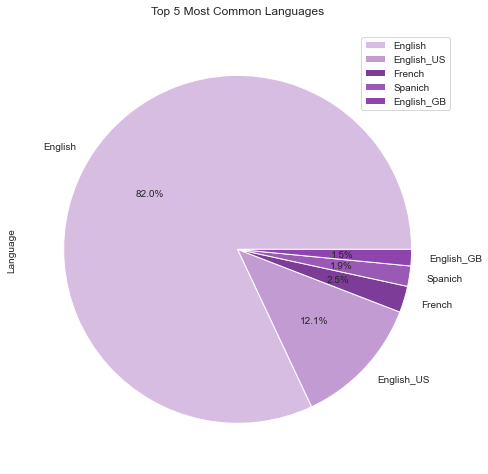

In [42]:
# create a color chart
colores = ["#d7bde2", "#c39bd3", "#7d3c98", "#9b59b6", "#8e44ad"]

# top 5 languages
data['language_code'].value_counts().head(5).plot(kind = 'pie', colors=colores, autopct='%1.1f%%',labels=tabla_comparativa["References"], figsize=(8, 8)).legend()
plt.ylabel('Language')
plt.title('Top 5 Most Common Languages\n')


These findings suggest that a book's popularity and quality are not always correlated with its genre or publication date, but may depend on factors such as the author and the number of reviews it receives. This analysis may be useful for writers and publishers seeking to better understand trends and reader tastes in today's literary marketplace.